# 1. Problem statement
Identify how the variables such as gender, ethnicity, lunch, test preparation, parental level impact on the test scores of students.

# 2. Data collection

<li>Dataset Source - <a href="https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977">https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977</a></li>


## 2.1 Importing data and required packges

### Importing Pandas,Numpy,Matplotlib,Seaborn and Warning libraries

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the data as a dataframe


In [23]:
df = pd.read_csv('data/student_data.csv')

### Show top 5 rows

In [24]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the data

In [4]:
df.shape

(1000, 8)

# 3. Dataset information

## 3.1 Checking missing values

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

No any missing values in all fields

## 3.2 Checking for duplicate values

In [7]:
df.duplicated().sum()

0


No any duplicate values

## 3.3 Check datatypes

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 3.4 Check for missing unique values in every column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## 3.5 Check the statics of the datset

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<li>There are three numerical features in the dataset 1000 datapoints for each column</li>
<li>Means of all three features are approximately simillar and vary between 66.08-69.16</li>
<li>Standard deviation of all three features are approximately simillar and vary between 14.60-15.19</li>
<li>Minimum value of math_score is 0 while reading and writing scores have 17 and 10 as minimum values respectively.</li>

## 3.6 Explore data

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Find unique values of each categorical feature

In [17]:
print('Unique values in gender :',end='')
print(df['gender'].unique())

print('Unique values in race_ethnicity :',end='')
print(df['race_ethnicity'].unique())

print('Unique values in parental_level_of_education :',end='')
print(df['parental_level_of_education'].unique())

print('Unique values in lunch :',end='')
print(df['lunch'].unique())

print('Unique values in test_preparation_course :',end='')
print(df['test_preparation_course'].unique())


Unique values in gender :['female' 'male']
Unique values in race_ethnicity :['group B' 'group C' 'group A' 'group D' 'group E']
Unique values in parental_level_of_education :["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique values in lunch :['standard' 'free/reduced']
Unique values in test_preparation_course :['none' 'completed']


### Find numerical and categorical features

In [22]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'object']

In [24]:
print('We have categorical features in dataframe such as: ', categorical_features)
print('We have numerical features in dataframe such as: ', numerical_features)

We have categorical features in dataframe such as:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
We have numerical features in dataframe such as:  ['math_score', 'reading_score', 'writing_score']


## 3.6 Add average_marks and total_marks columns to the dataframe

In [25]:
df['total_marks'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_marks'] = df['total_marks']/3

In [26]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,average_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## 3.7 Check for full marks and marks below 20

### Full marks


In [43]:
reading_full = df[df['reading_score']==100]['average_marks'].count()
writing_full = df[df['writing_score']==100]['average_marks'].count()
math_full = df[df['math_score']==100]['average_marks'].count()


print(f'Number of studnets have full marks for math: {math_full}')
print(f'Number of studnets have full marks for reading: {reading_full}')
print(f'Number of studnets have full marks for writing: {writing_full}')


Number of studnets have full marks for math: 7
Number of studnets have full marks for reading: 17
Number of studnets have full marks for writing: 14


### Marks below 20

In [44]:
reading_under_20 = df[df['reading_score']<=20]['average_marks'].count()
writing_under_20 = df[df['writing_score']<=20]['average_marks'].count()
math_under_20 = df[df['math_score']<=20]['average_marks'].count()


print(f'Number of studnets have marks below 20 for math: {math_under_20}')
print(f'Number of studnets have marks below 20 for reading: {reading_under_20}')
print(f'Number of studnets have marks below 20 for writing: {writing_under_20}')

Number of studnets have marks below 20 for math: 4
Number of studnets have marks below 20 for reading: 1
Number of studnets have marks below 20 for writing: 3


<li> Students performing well for reading than writing and math. Because less number of students have below 20 and high number of students have full marks for reading. </li>

<li> Students have less performance of maths. </li>

# 4. Data visualization

## 4.1 Histogram and KDE for average_marks and total_marks with gender

### Average_marks and average_marks with gender

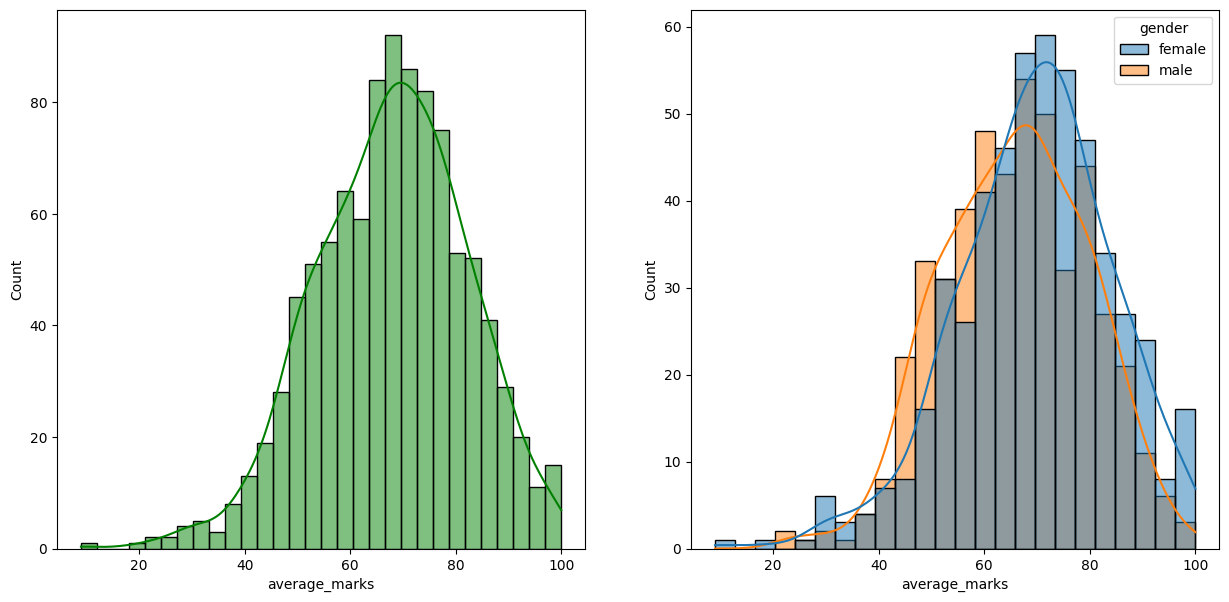

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average_marks',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_marks',kde=True,hue='gender')
plt.show()

<li>Most of the studnets scored betwwen 60-80</li>
<li>Female students perform better than male students</li>

### Total_marks and total_marks with gender

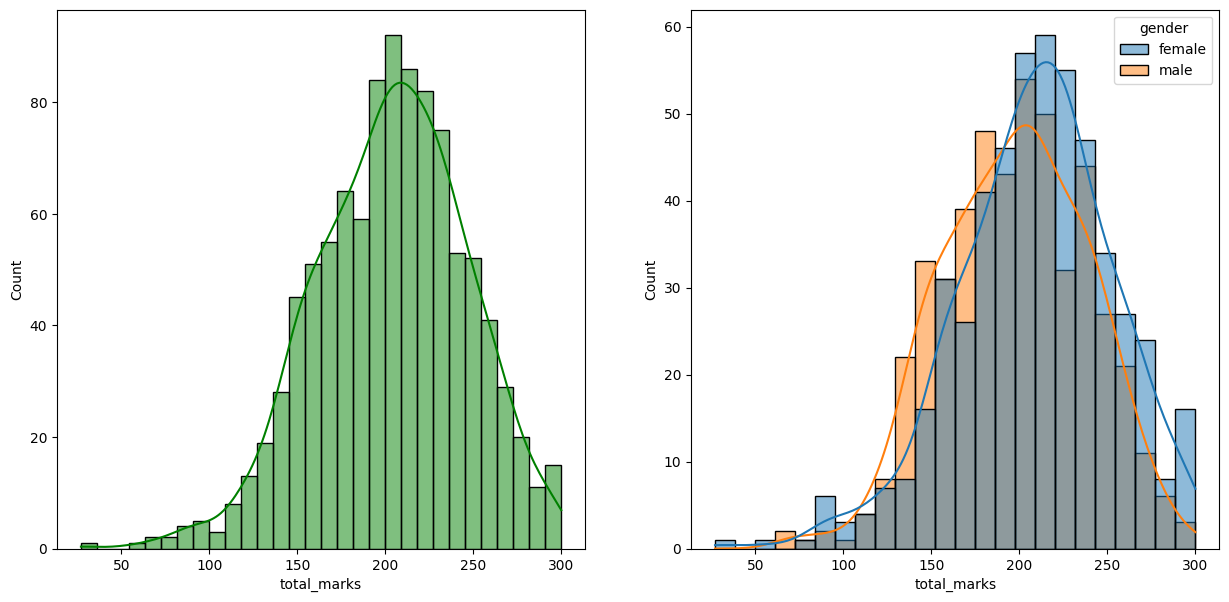

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_marks',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_marks',kde=True,hue='gender')
plt.show()

<li>Most of the studnets scored betwwen 200-250</li>
<li>Female students perform better than male students</li>

### Average_marks with race_ethnicity and gender

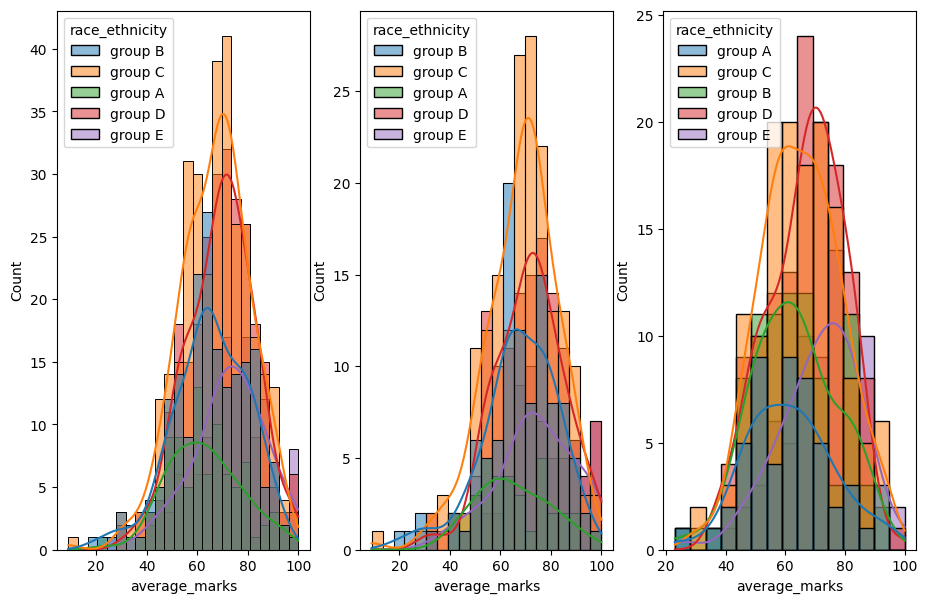

In [52]:
fig, axs = plt.subplots(1,3, figsize=(15, 7))
plt.subplot(141)
sns.histplot(data=df,x='average_marks',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_marks',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_marks',kde=True,hue='race_ethnicity')
plt.show()

<li>Generally, Performance of the group C is better while the performance of the group A is worse.</li>
<li>Incase of females, Performance of the group C is better while the performance of the group A is worse.</li>
<li>Incase of males, Performance of the group D is better while the performance of the group A is worse.</li>

### Average_marks with parental_level_of_education and gender

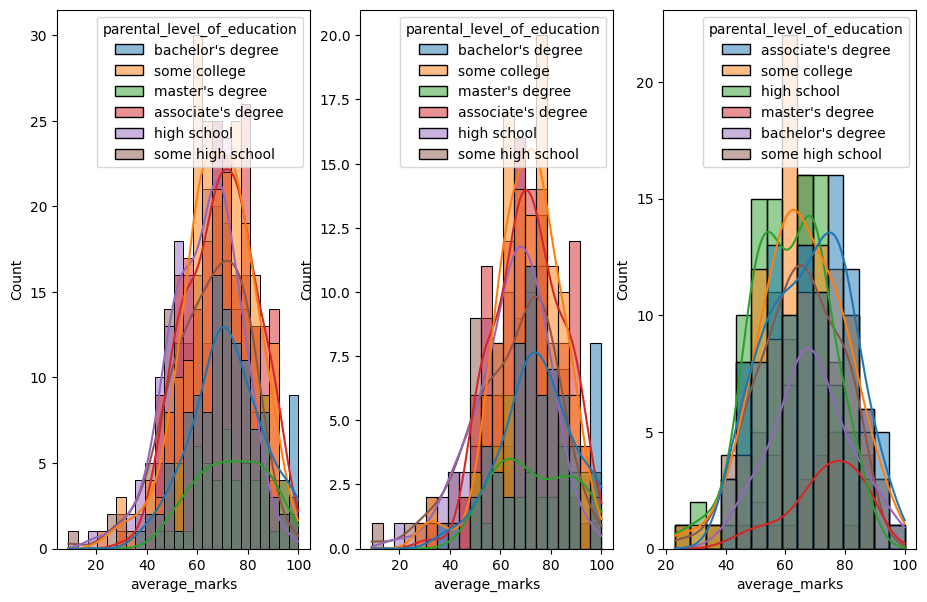

In [53]:
fig, axs = plt.subplots(1,3, figsize=(15, 7))
plt.subplot(141)
sns.histplot(data=df,x='average_marks',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_marks',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_marks',kde=True,hue='parental_level_of_education')
plt.show()

<li>Generally, students from some collage have higher tendancy of getting average marks.</li>
<li>Students with master degree have high tendancy achieve high avarage marks.</li>

### Average_marks with lunch and gender

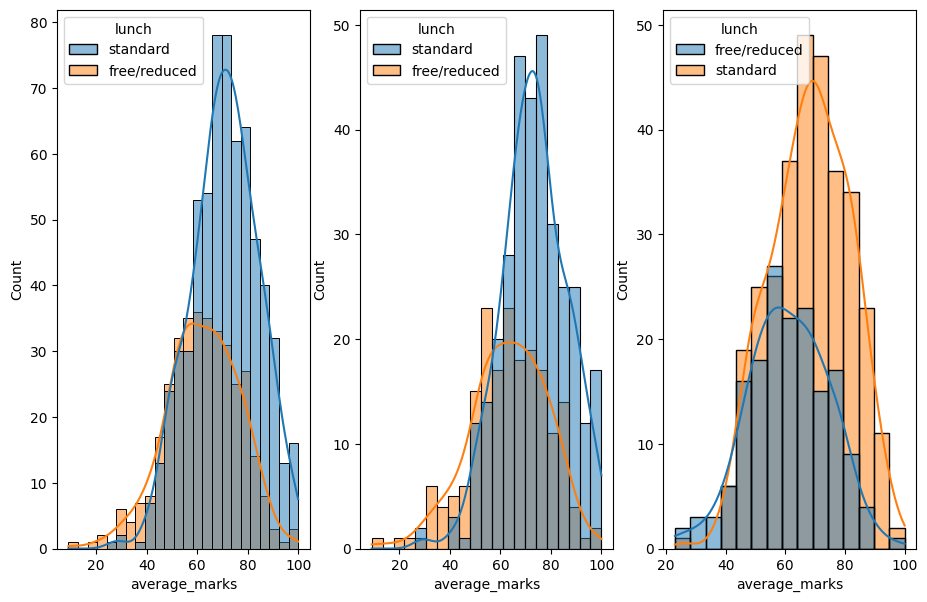

In [10]:
fig, axs = plt.subplots(1,3, figsize=(15, 7))
plt.subplot(141)
sns.histplot(data=df,x='average_marks',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_marks',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_marks',kde=True,hue='lunch')
plt.show()

<li>Students who have standard lunch have tendancy to get higher average marks</li>
<li>Female students who have standard lunch have tendancy to get higher average marks</li>
<li>Male students who have free/reduced lunch have tendancy to get higher average marks</li>

### Average_marks with test_preparation_course and gender

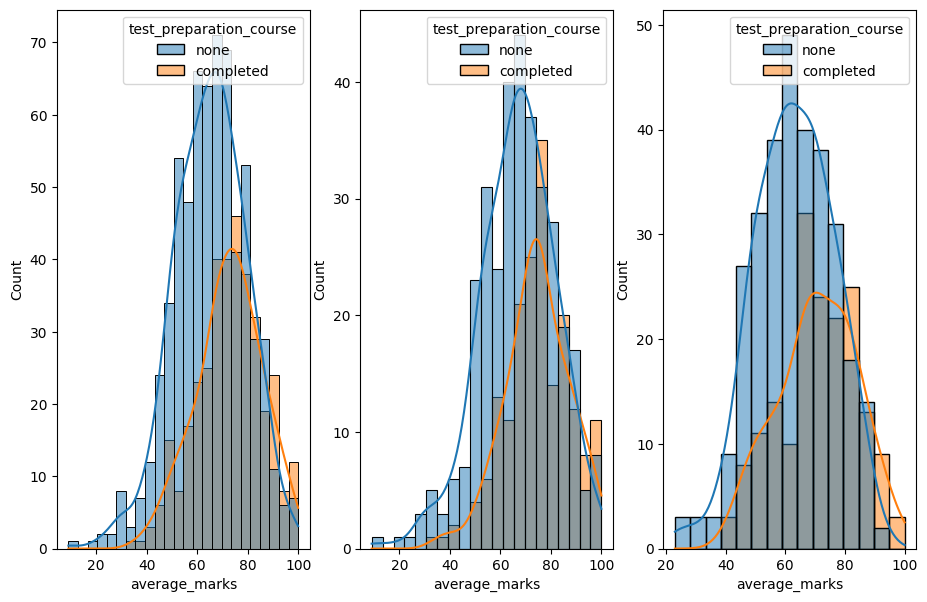

In [11]:
fig, axs = plt.subplots(1,3, figsize=(15, 7))
plt.subplot(141)
sns.histplot(data=df,x='average_marks',kde=True,hue='test_preparation_course')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_marks',kde=True,hue='test_preparation_course')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_marks',kde=True,hue='test_preparation_course')
plt.show()

<li>Overall, the students who have completed test preperation course have higher tendancy to getting higher marks while most of the other students getting average marks</li>

## 4.2 Maximum score of students in all three subjects

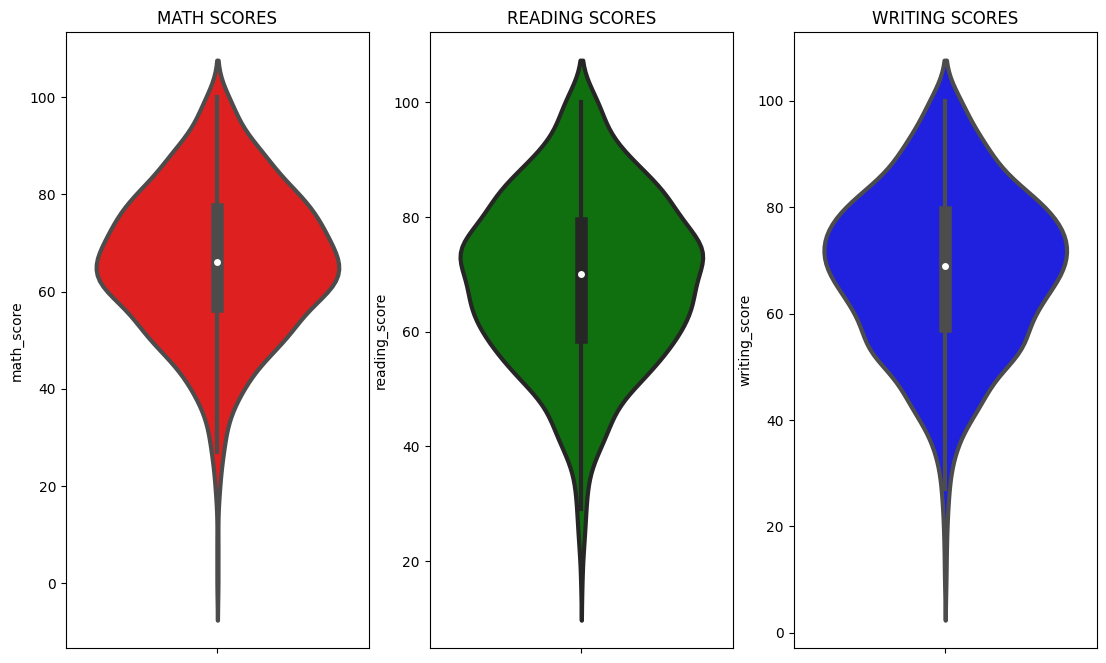

In [13]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

<li>Most of the studnts scores between 50-80 in maths</li>
<li>Most of the studnts scores between 60-80 in reading and writing</li>

## 4.3 Multivariate analysis using pyplots

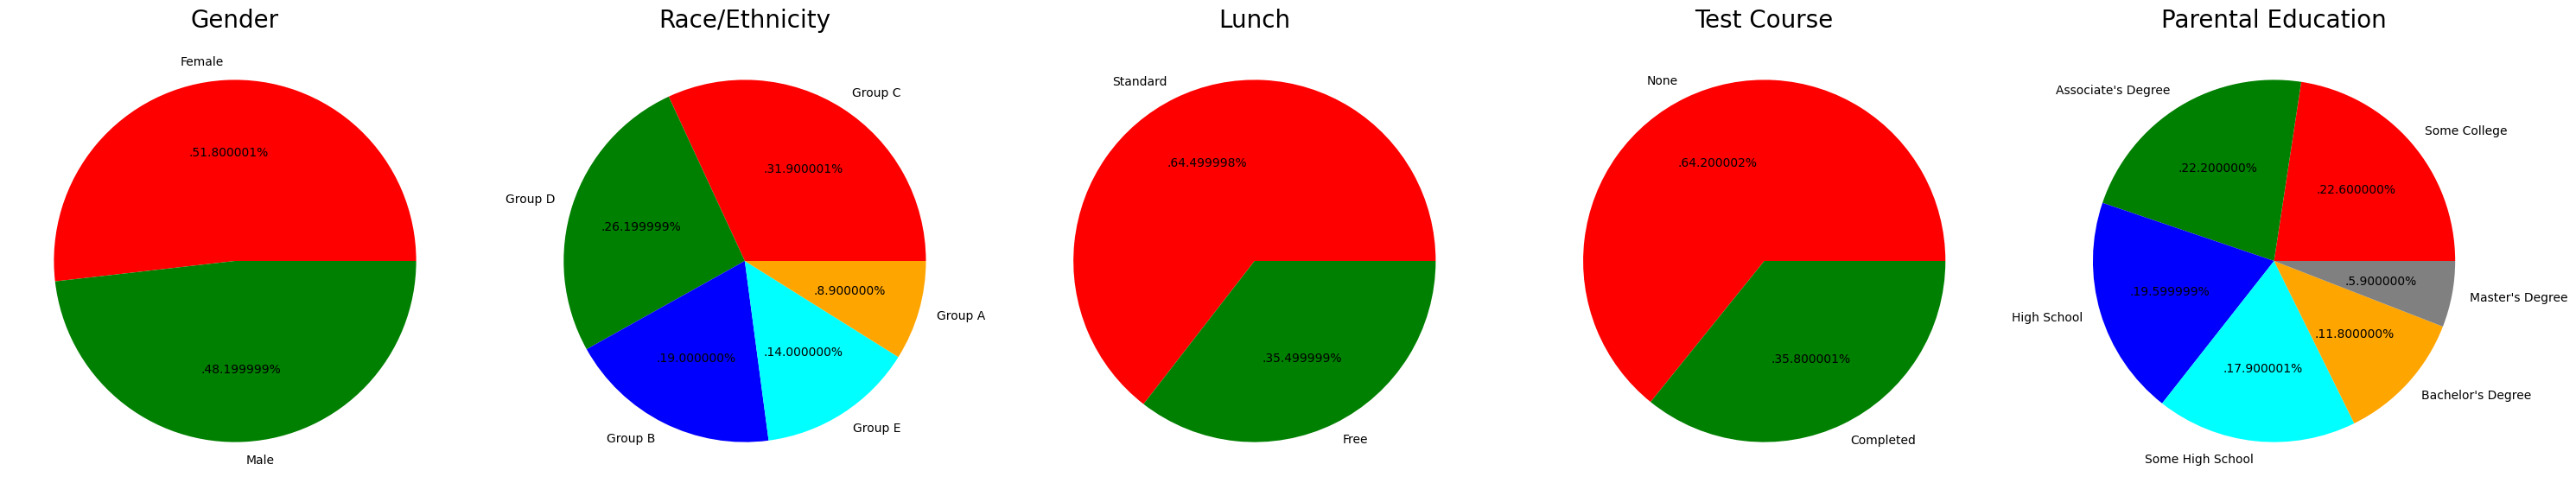

In [14]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

<ul>
  <li>The number of male and female students is approximately the same.</li>
  <li>Group C has the highest number of students.</li>
  <li>The majority of students have a standard lunch.</li>
  <li>A larger number of students have not enrolled in any test preparation course.</li>
  <li>The number of students with parents having "Some College" education is the highest, followed closely by those with an "Associate's Degree" education.</li>
</ul>


## 4.4 Vizualize according to features

### Gender feature

#### How the distribution of Gender?

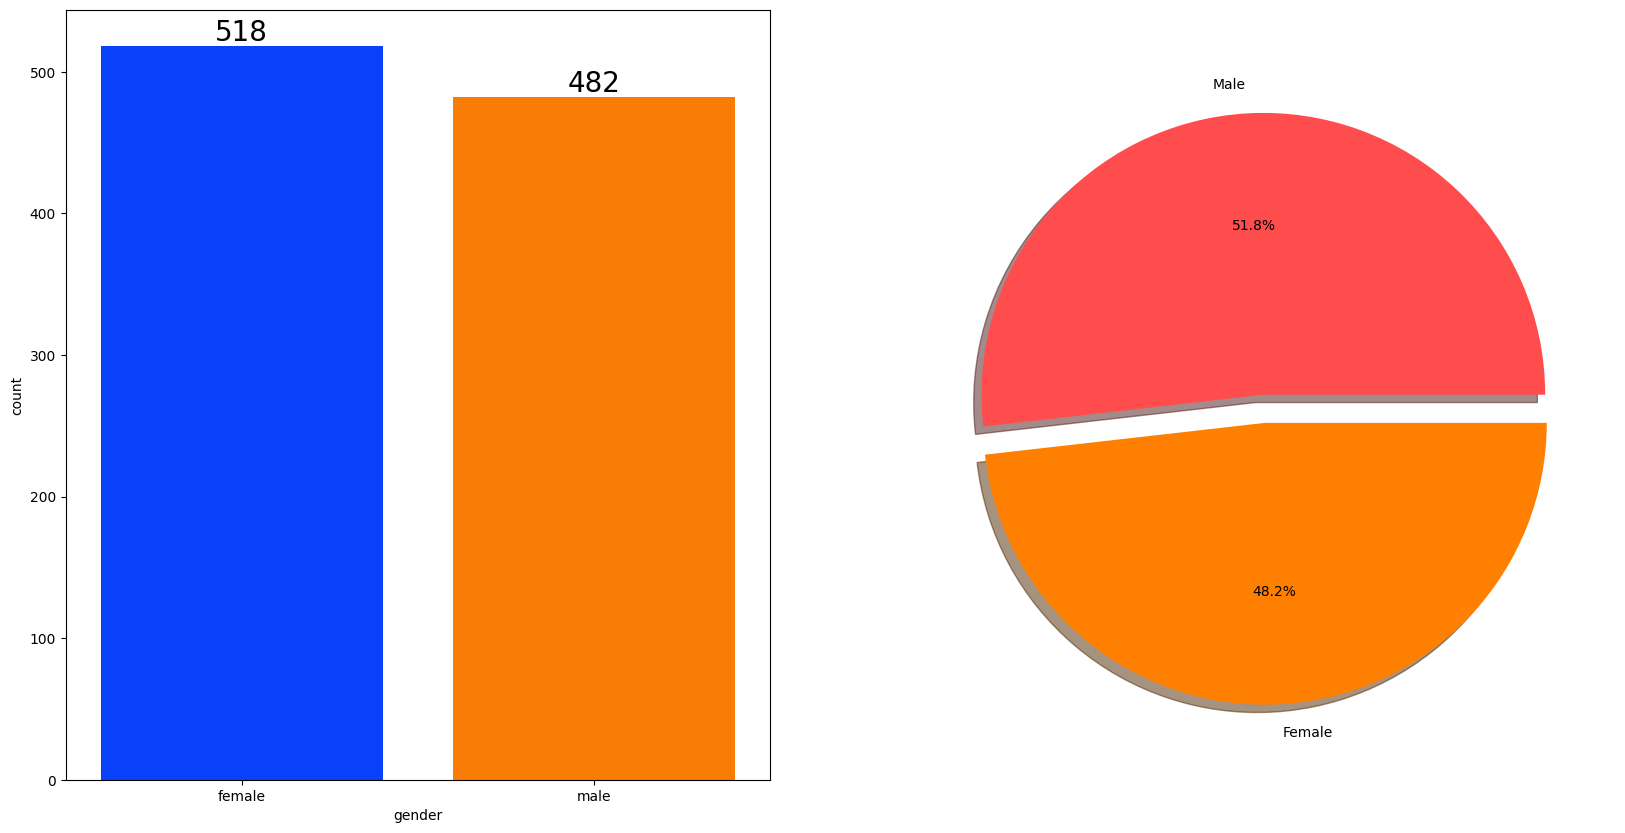

In [8]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

<li>51.8% of the entire population are males</li>
<li>48.2% of the population are females</li>

#### Gender has impact on average score?

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,average_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [27]:

# Select numeric columns for calculation
numeric_columns_df = ['math_score', 'reading_score', 'writing_score', 'total_marks', 'average_marks']
numeric_df = df[numeric_columns_df]

# Group by 'gender' and calculate the mean
gender_group = numeric_df.groupby(df['gender']).mean()

print(gender_group)

        math_score  reading_score  writing_score  total_marks  average_marks
gender                                                                      
female   63.633205      72.608108      72.467181   208.708494      69.569498
male     68.728216      65.473029      63.311203   197.512448      65.837483


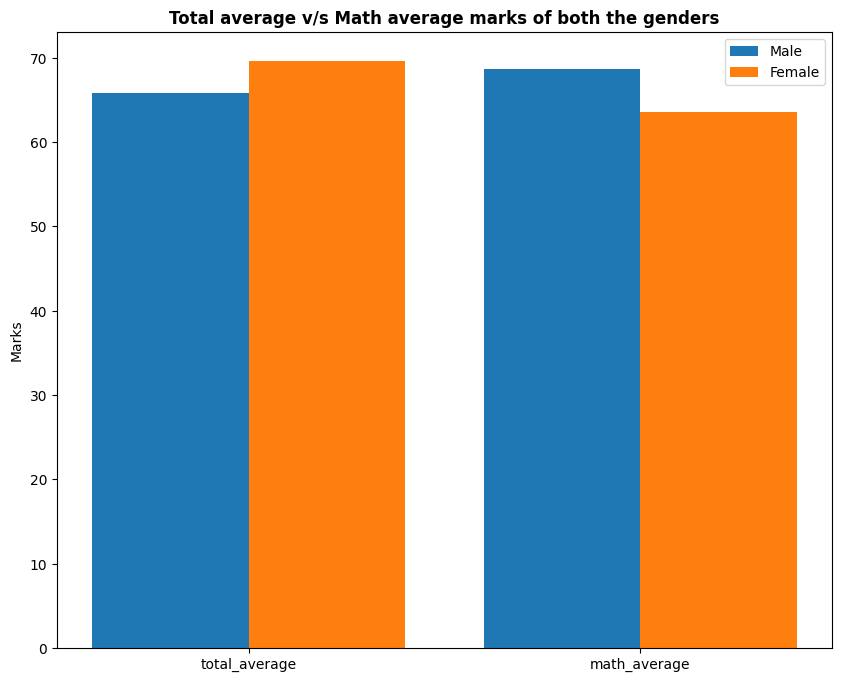

In [28]:
plt.figure(figsize=(10, 8))

X = ['total_average','math_average']


female_scores = [gender_group['average_marks'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_marks'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()


<li>Overall, emale students perform better than male students</li>
<li>Male students perform better than females in maths</li>

### Race ethnicity feature

#### How is group wise distribution?

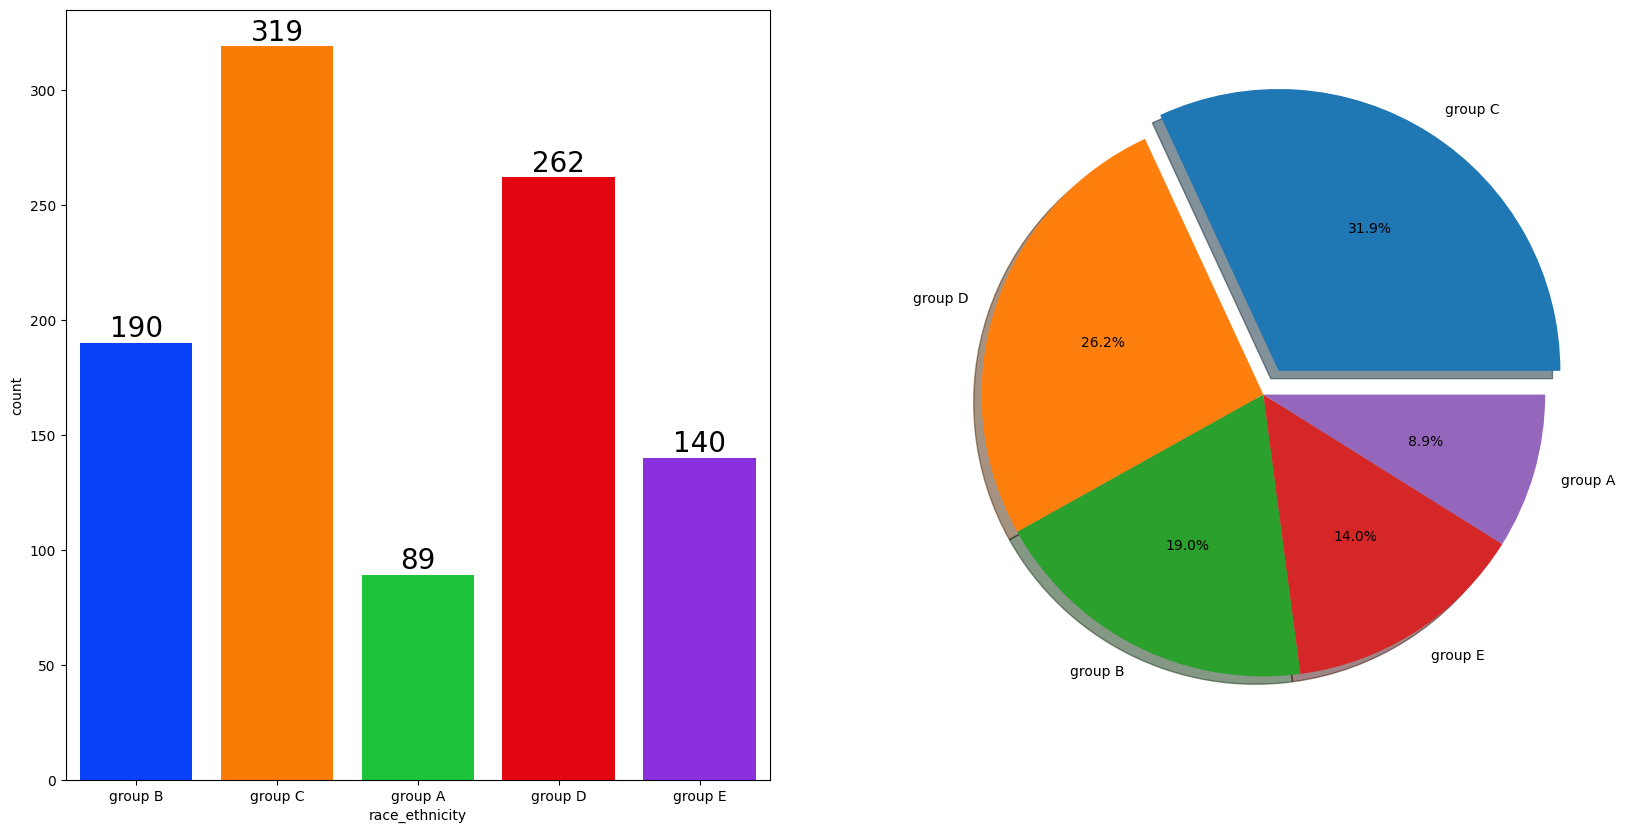

In [50]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

<li>Majority of the students from group C and Group D races (26.2%)</li>
<li>Few students from the Group A race (8.9%)</li>

In [62]:
# Select numeric columns for calculation
numeric_columns_df = ['math_score', 'reading_score', 'writing_score', 'total_marks', 'average_marks']
numeric_df = df[numeric_columns_df]

# Group by 'gender' and calculate the mean
race_ethnicity_group = numeric_df.groupby(df['race_ethnicity']).mean()

print(race_ethnicity_group)

                math_score  reading_score  writing_score  total_marks   
race_ethnicity                                                          
group A          61.629213      64.674157      62.674157   188.977528  \
group B          63.452632      67.352632      65.600000   196.405263   
group C          64.463950      69.103448      67.827586   201.394984   
group D          67.362595      70.030534      70.145038   207.538168   
group E          73.821429      73.028571      71.407143   218.257143   

                average_marks  
race_ethnicity                 
group A             62.992509  
group B             65.468421  
group C             67.131661  
group D             69.179389  
group E             72.752381  


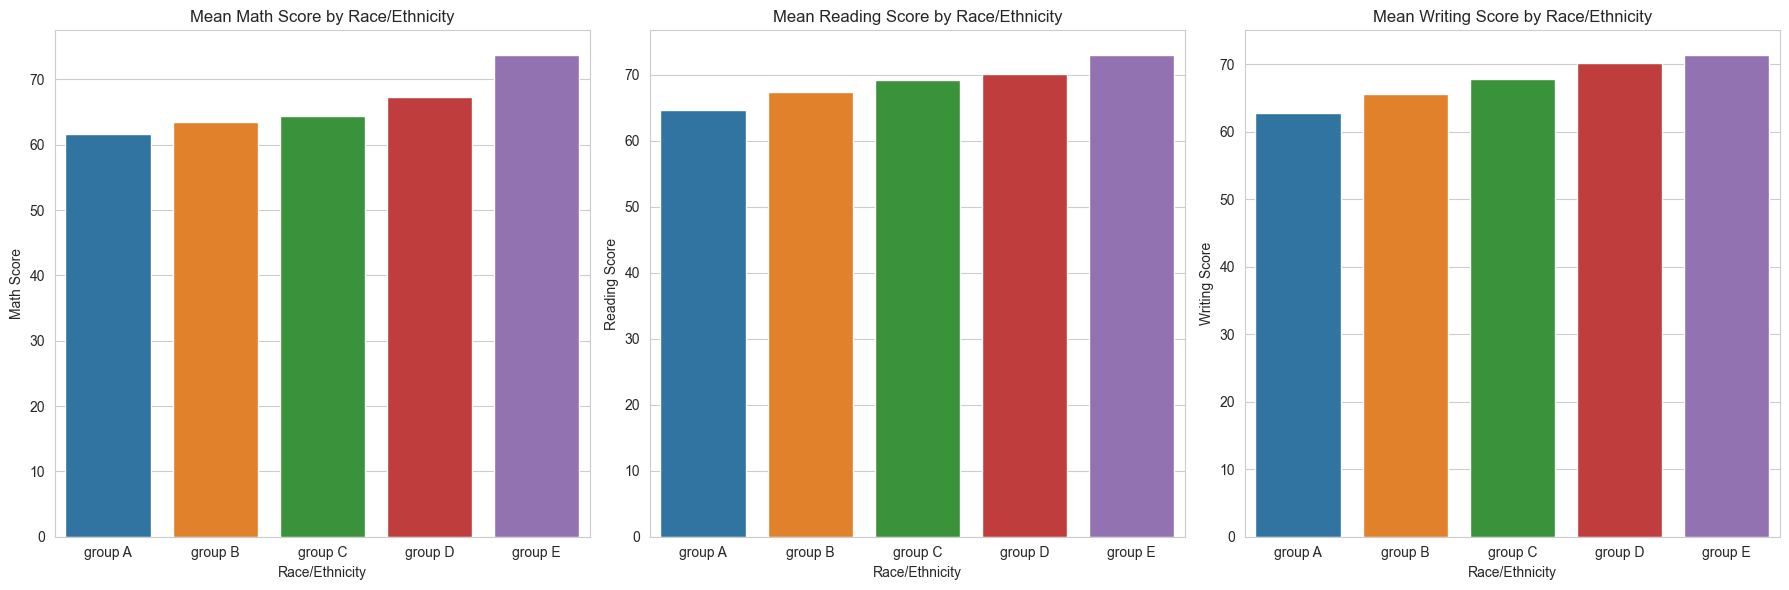

In [63]:
# Set the style of the plots
sns.set_style("whitegrid")

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting math_score
sns.barplot(x=race_ethnicity_group.index, y=race_ethnicity_group['math_score'], ax=axes[0])
axes[0].set_title('Mean Math Score by Race/Ethnicity')
axes[0].set_xlabel('Race/Ethnicity')
axes[0].set_ylabel('Math Score')

# Plotting reading_score
sns.barplot(x=race_ethnicity_group.index, y=race_ethnicity_group['reading_score'], ax=axes[1])
axes[1].set_title('Mean Reading Score by Race/Ethnicity')
axes[1].set_xlabel('Race/Ethnicity')
axes[1].set_ylabel('Reading Score')

# Plotting writing_score
sns.barplot(x=race_ethnicity_group.index, y=race_ethnicity_group['writing_score'], ax=axes[2])
axes[2].set_title('Mean Writing Score by Race/Ethnicity')
axes[2].set_xlabel('Race/Ethnicity')
axes[2].set_ylabel('Writing Score')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

<li>Students from race group E scores more</li>
<li>Students from race group A scores less</li>

### Parental level of education feature

#### What is educational background of student's parent?

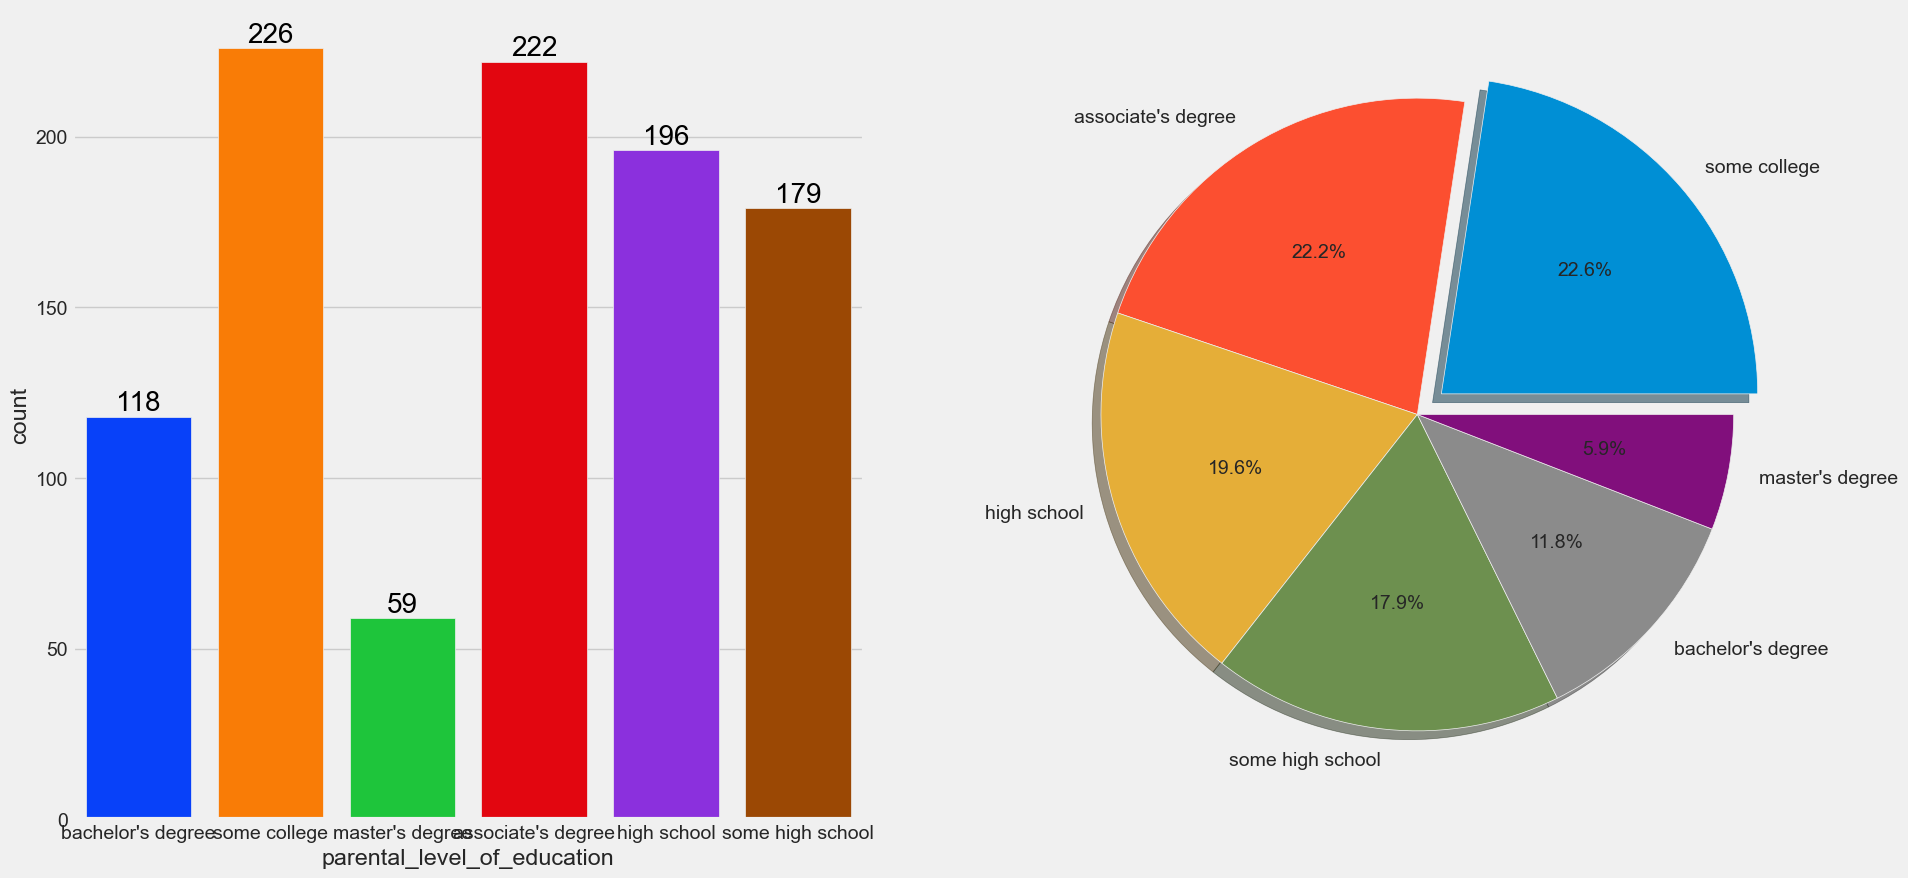

In [68]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['parental_level_of_education'].value_counts(),labels=df['parental_level_of_education'].value_counts().index,explode=[0.1,0,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

<li>Most of the parents have associate degree or some college</li>
<li>Very few parents have master's degree</li>

#### Is parental education has any impact on student's performance ?

In [69]:
# Select numeric columns for calculation
numeric_columns_df = ['math_score', 'reading_score', 'writing_score', 'total_marks', 'average_marks']
numeric_df = df[numeric_columns_df]

# Group by 'parental education' and calculate the mean
parental_education_group = numeric_df.groupby(df['parental_level_of_education']).mean()

print(parental_education_group)

                             math_score  reading_score  writing_score   
parental_level_of_education                                             
associate's degree            67.882883      70.927928      69.896396  \
bachelor's degree             69.389831      73.000000      73.381356   
high school                   62.137755      64.704082      62.448980   
master's degree               69.745763      75.372881      75.677966   
some college                  67.128319      69.460177      68.840708   
some high school              63.497207      66.938547      64.888268   

                             total_marks  average_marks  
parental_level_of_education                              
associate's degree            208.707207      69.569069  
bachelor's degree             215.771186      71.923729  
high school                   189.290816      63.096939  
master's degree               220.796610      73.598870  
some college                  205.429204      68.476401  
some high

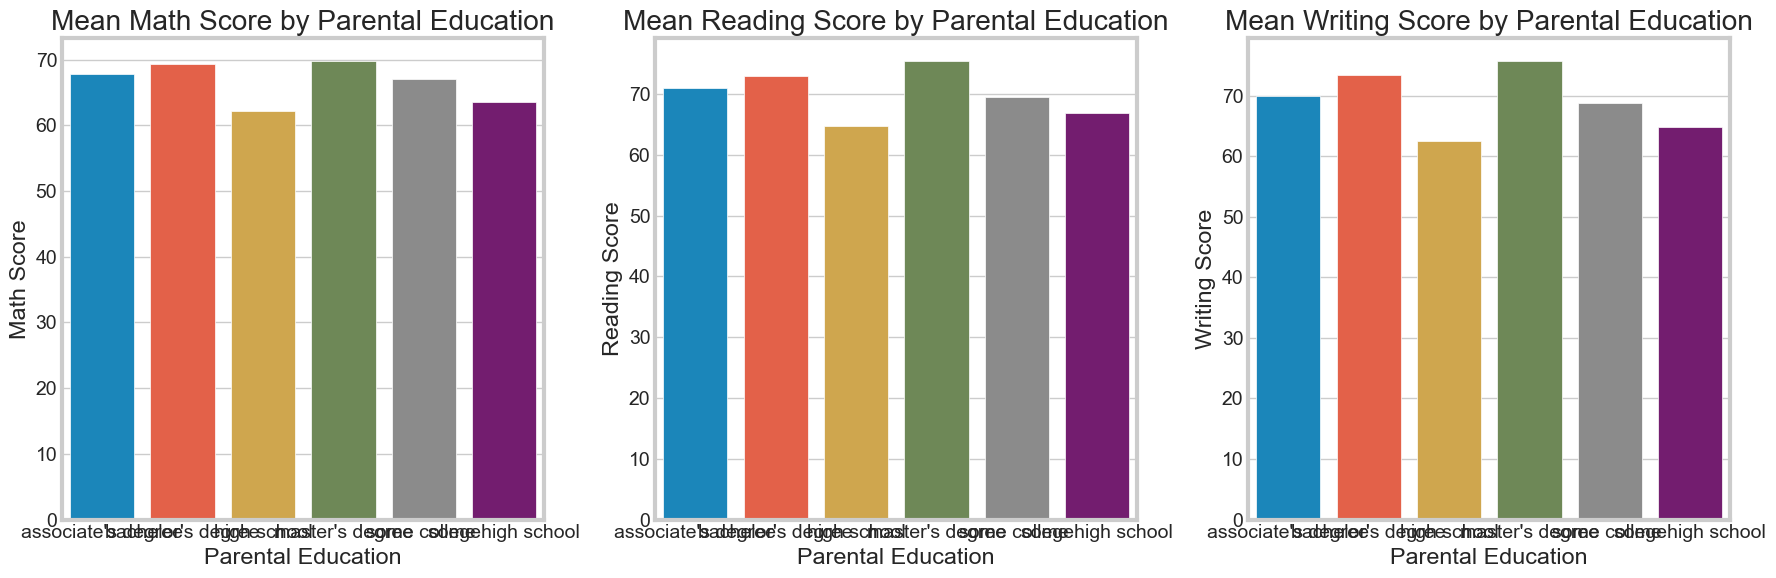

In [70]:
# Set the style of the plots
sns.set_style("whitegrid")

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting math_score
sns.barplot(x=parental_education_group.index, y=parental_education_group['math_score'], ax=axes[0])
axes[0].set_title('Mean Math Score by Parental Education')
axes[0].set_xlabel('Parental Education')
axes[0].set_ylabel('Math Score')

# Plotting reading_score
sns.barplot(x=parental_education_group.index, y=parental_education_group['reading_score'], ax=axes[1])
axes[1].set_title('Mean Reading Score by Parental Education')
axes[1].set_xlabel('Parental Education')
axes[1].set_ylabel('Reading Score')

# Plotting writing_score
sns.barplot(x=parental_education_group.index, y=parental_education_group['writing_score'], ax=axes[2])
axes[2].set_title('Mean Writing Score by Parental Education')
axes[2].set_xlabel('Parental Education')
axes[2].set_ylabel('Writing Score')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

<li>Students who have parents with bachelors or masters degree performs well in all three fiels</li>

### Lunch Feature

#### Which type of lunch is most common amoung students ?

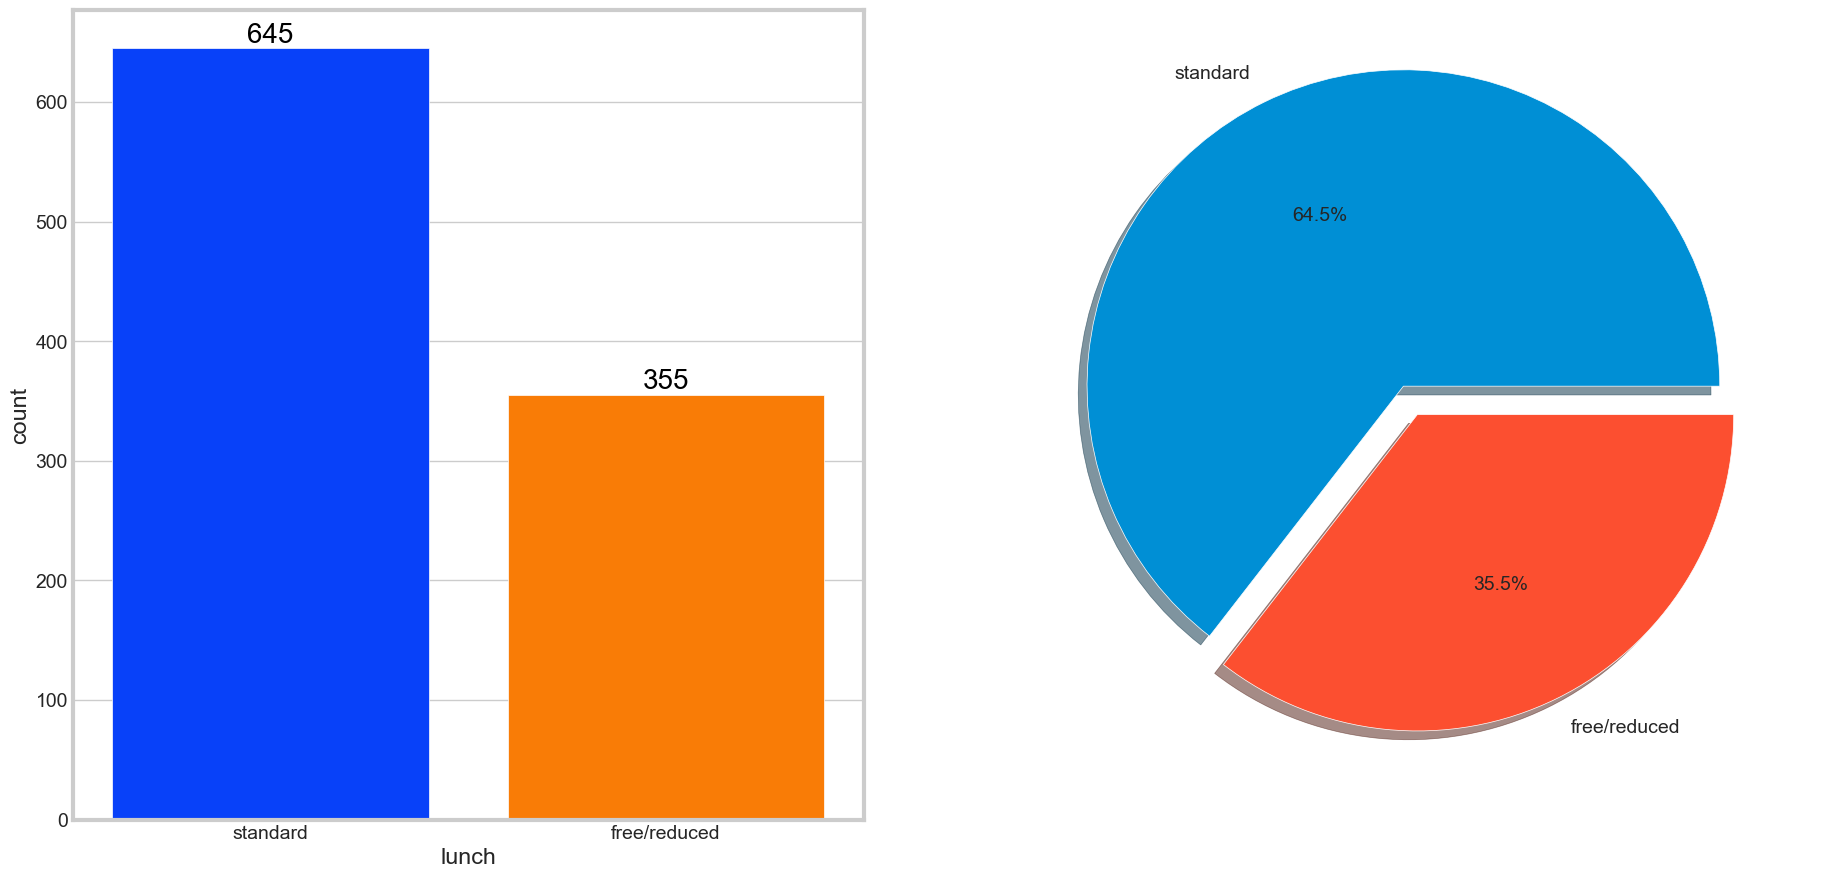

In [71]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['lunch'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['lunch'].value_counts(),labels=df['lunch'].value_counts().index,explode=[0.1,0],autopct='%1.1f%%',shadow=True)
plt.show()   

<li>Majority(64.5%) of students have standard meal</li>

#### What is the effect of lunch type on test results?

In [72]:
# Select numeric columns for calculation
numeric_columns_df = ['math_score', 'reading_score', 'writing_score', 'total_marks', 'average_marks']
numeric_df = df[numeric_columns_df]

# Group by 'lunch' and calculate the mean
lunch_group = numeric_df.groupby(df['lunch']).mean()

print(lunch_group)

              math_score  reading_score  writing_score  total_marks   
lunch                                                                 
free/reduced   58.921127      64.653521      63.022535   186.597183  \
standard       70.034109      71.654264      70.823256   212.511628   

              average_marks  
lunch                        
free/reduced      62.199061  
standard          70.837209  


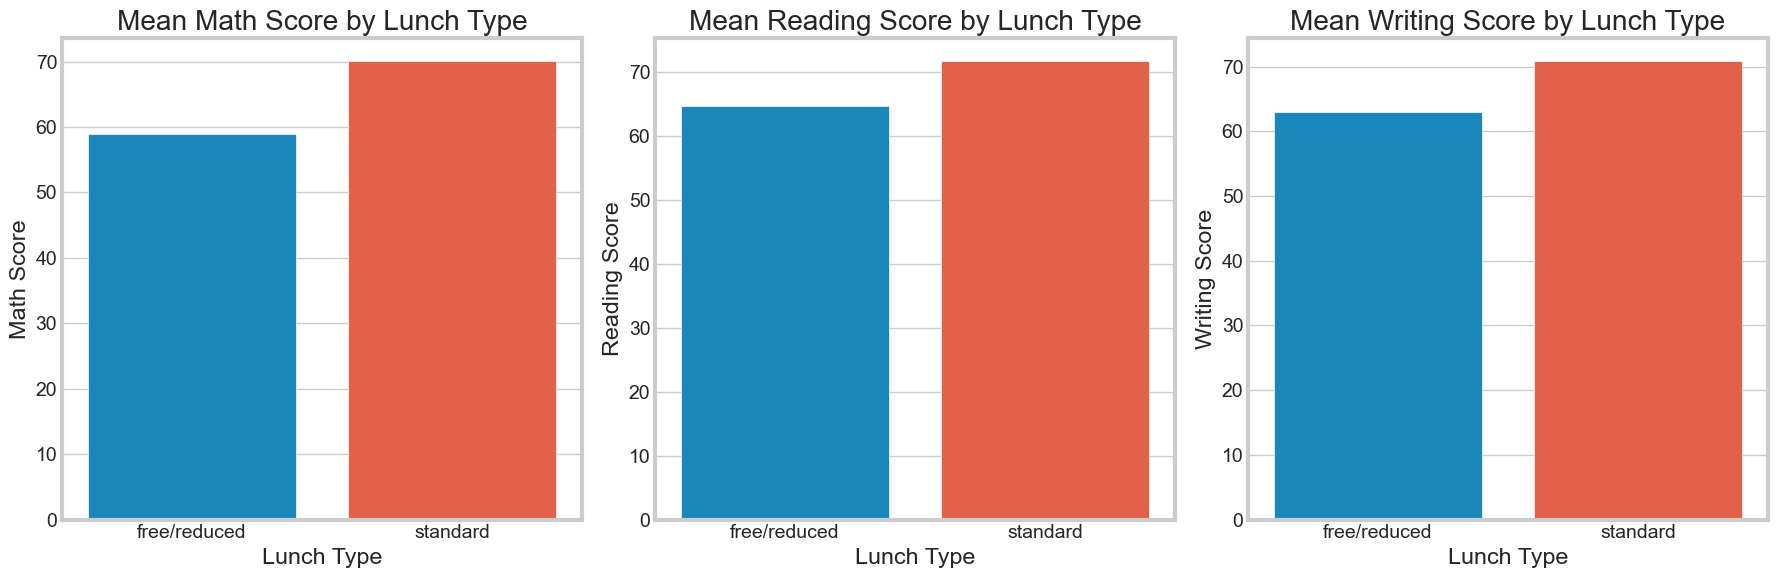

In [74]:
# Set the style of the plots
sns.set_style("whitegrid")

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting math_score
sns.barplot(x=lunch_group.index, y=lunch_group['math_score'], ax=axes[0])
axes[0].set_title('Mean Math Score by Lunch Type')
axes[0].set_xlabel('Lunch Type')
axes[0].set_ylabel('Math Score')

# Plotting reading_score
sns.barplot(x=lunch_group.index, y=lunch_group['reading_score'], ax=axes[1])
axes[1].set_title('Mean Reading Score by Lunch Type')
axes[1].set_xlabel('Lunch Type')
axes[1].set_ylabel('Reading Score')

# Plotting writing_score
sns.barplot(x=lunch_group.index, y=lunch_group['writing_score'], ax=axes[2])
axes[2].set_title('Mean Writing Score by Lunch Type')
axes[2].set_xlabel('Lunch Type')
axes[2].set_ylabel('Writing Score')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

<li>It's very clear that the studnets who have free or reduced meal not perform well compared to  students who have standard luch</li>

### Test preperation course feature

#### What percentage of studnets completed the test preperation course?

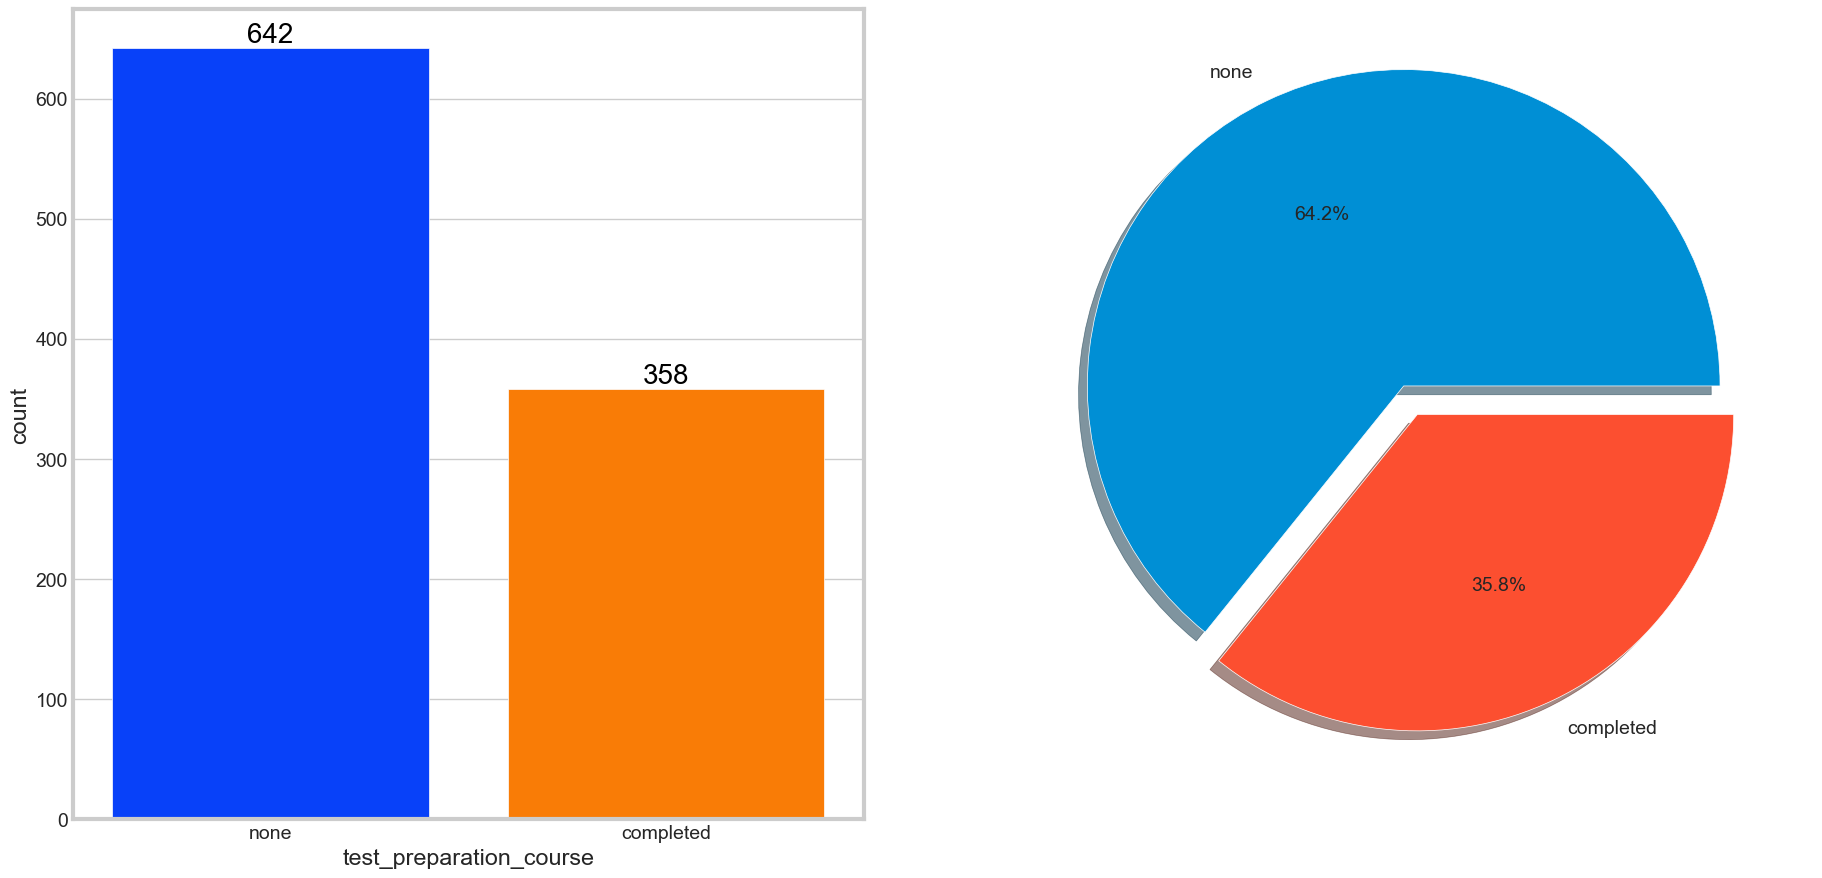

In [75]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['test_preparation_course'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['test_preparation_course'].value_counts(),labels=df['test_preparation_course'].value_counts().index,explode=[0.1,0],autopct='%1.1f%%',shadow=True)
plt.show()  

<li>64.2% (most of) students didn't completed the test preperation course.</li>

#### Is Test prepration course has any impact on student's performance ?

In [76]:
# Select numeric columns for calculation
numeric_columns_df = ['math_score', 'reading_score', 'writing_score', 'total_marks', 'average_marks']
numeric_df = df[numeric_columns_df]

# Group by 'test preperation course' and calculate the mean
test_prperation_group = numeric_df.groupby(df['test_preparation_course']).mean()

print(test_prperation_group)

                         math_score  reading_score  writing_score   
test_preparation_course                                             
completed                 69.695531      73.893855      74.418994  \
none                      64.077882      66.534268      64.504673   

                         total_marks  average_marks  
test_preparation_course                              
completed                 218.008380      72.669460  
none                      195.116822      65.038941  


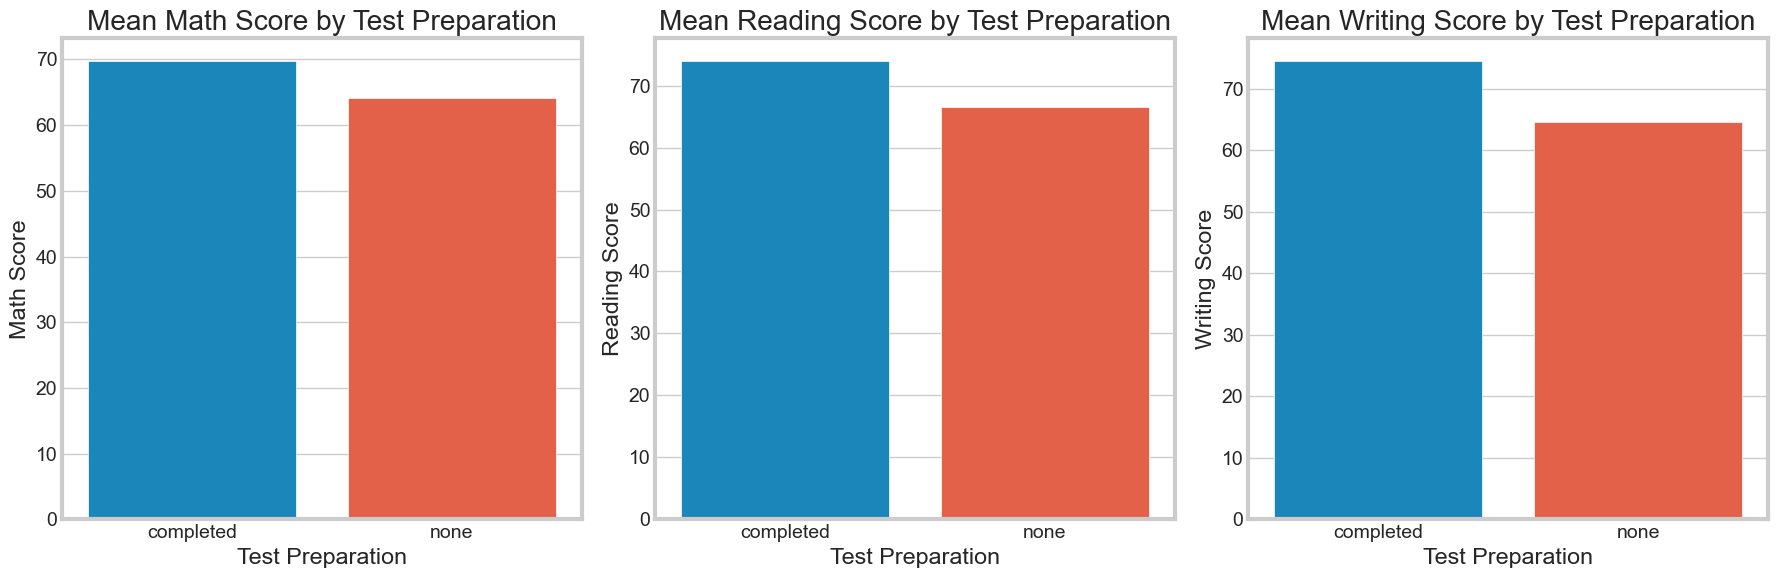

In [77]:
# Set the style of the plots
sns.set_style("whitegrid")

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting math_score
sns.barplot(x=test_prperation_group.index, y=test_prperation_group['math_score'], ax=axes[0])
axes[0].set_title('Mean Math Score by Test Preparation')
axes[0].set_xlabel('Test Preparation')
axes[0].set_ylabel('Math Score')

# Plotting reading_score
sns.barplot(x=test_prperation_group.index, y=test_prperation_group['reading_score'], ax=axes[1])
axes[1].set_title('Mean Reading Score by Test Preparation')
axes[1].set_xlabel('Test Preparation')
axes[1].set_ylabel('Reading Score')

# Plotting writing_score
sns.barplot(x=test_prperation_group.index, y=test_prperation_group['writing_score'], ax=axes[2])
axes[2].set_title('Mean Writing Score by Test Preparation')
axes[2].set_xlabel('Test Preparation')
axes[2].set_ylabel('Writing Score')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


<li>It's very clear students who complted the test prperation course, perform better than who didn't</li>

### Check outliers

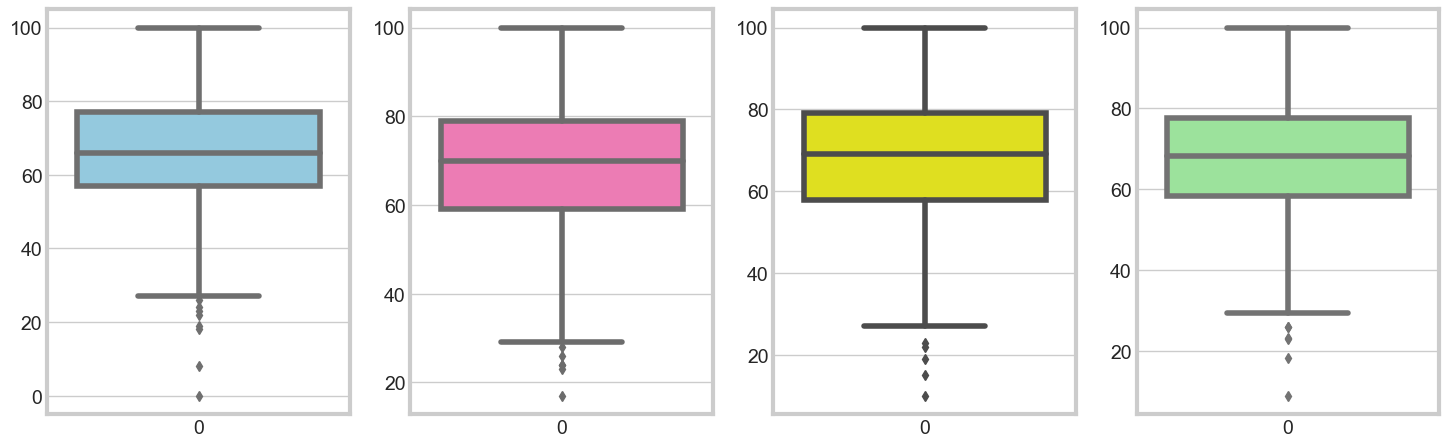

In [79]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_marks'],color='lightgreen')
plt.show()

<li>Some outliers are included in all three scores according to the boxplot. But that data points possible exsist as student marks</li>

### Multivariate Analysis using pair plot

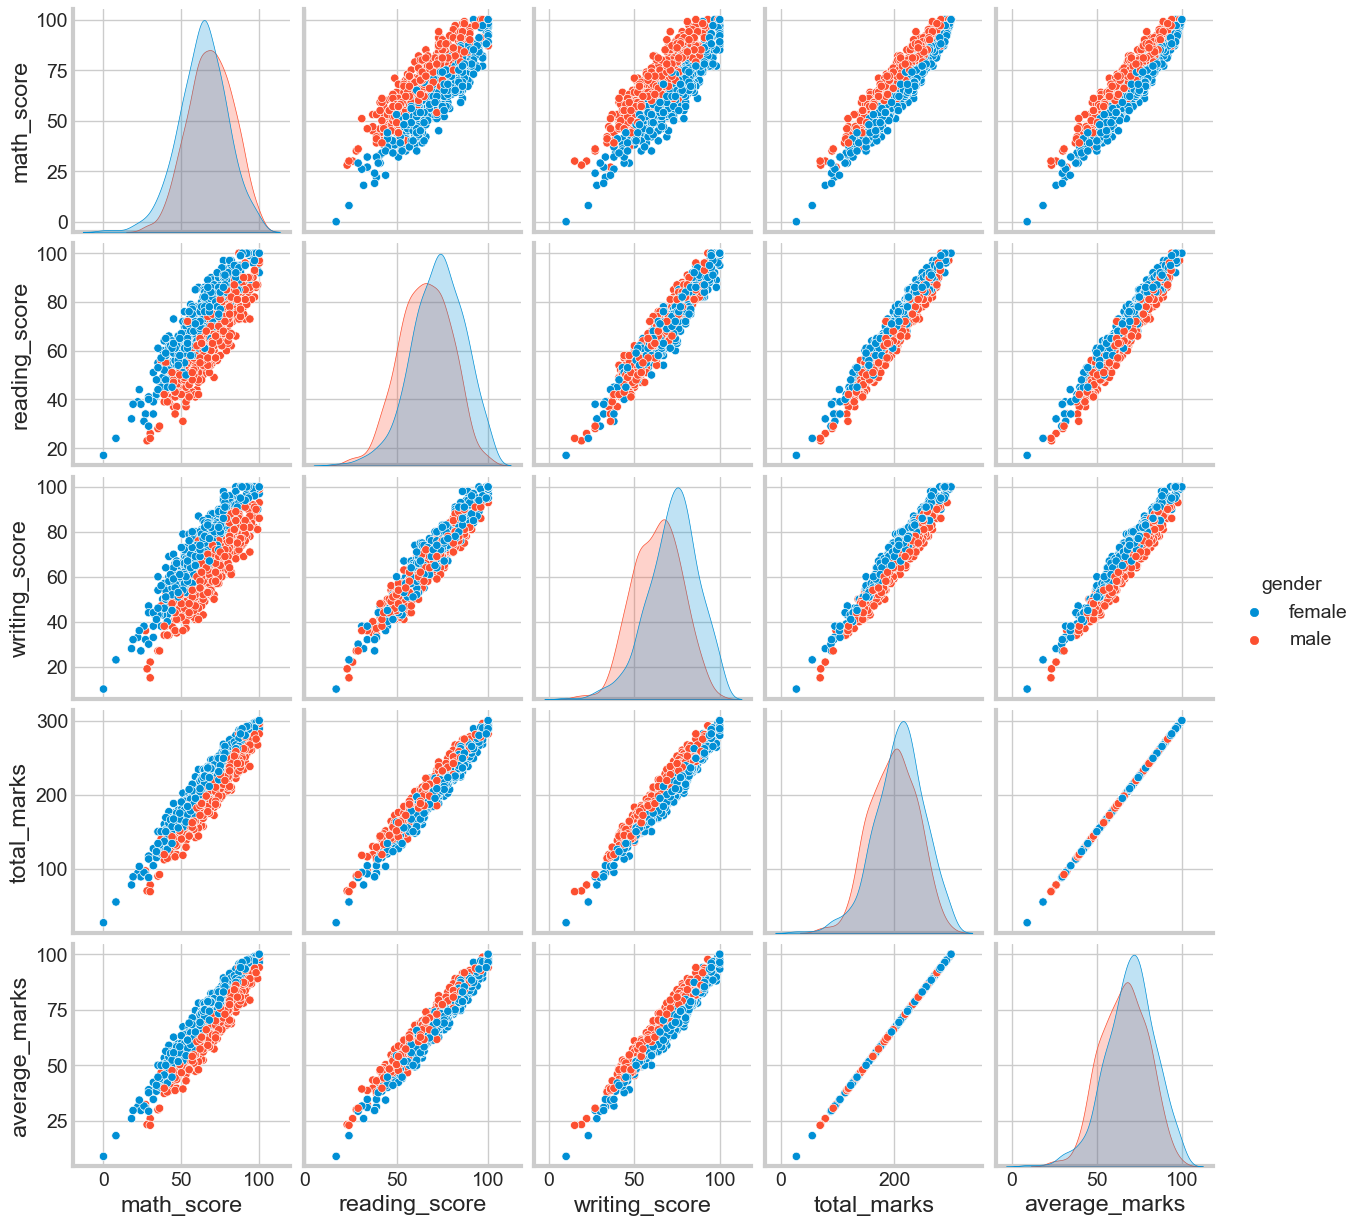

In [80]:
sns.pairplot(df,hue = 'gender')
plt.show()

<li>All the scores increase linearly with each other.</li>

# 5. Conclusion

<ul>
  <li>Student's Performance is influenced by factors such as lunch, race, and parental level of education.</li>
  <li>Females have a higher pass percentage and are also among the top-scorers.</li>
  <li>There is not a strong correlation between a student's performance and their participation in a test preparation course.</li>
  <li>Completing a test preparation course has benefits for students.</li>
</ul>